# Procesamiento de Imágenes - Trabajo Práctico N°5
## Grupo 3
* Santiago Arribere
* Matías Francois
* Joaquín Gaytan
* Pablo Scheinfeld

# Ejercicio 2 - Wiener
## Blur + Noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian, convolve2d, wiener
from PIL import Image
import sys
# Add the folder path to the sys.path list
sys.path.append('../../src/helpers/')
from mse import mse
from add_noise import add_noise

### Ejemplo 1

(512, 512)


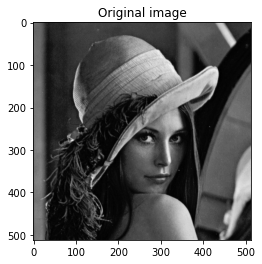

In [2]:
# Open image
img = np.array(Image.open('../../assets/lenagray.tif').convert('L'))

# Plot image
plt.title('Original image')
plt.imshow(img, cmap='gray');
print(img.shape)

##### Blur Image

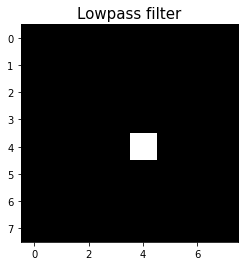

In [3]:
# Generate low-pass filter to distort image
kernel_size = 8
lpf = np.ones((kernel_size, kernel_size)) / kernel_size ** 2

plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(lpf))), cmap='gray', vmax=1)
plt.title('Lowpass filter', fontsize=15)
plt.show()

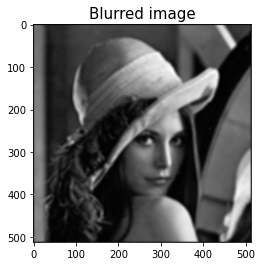

MSE = 135.36760671809316


In [4]:
# Blur
def blur_img(img, lpf):
    blurred_img = convolve2d(img, lpf, mode = 'same')
    plt.imshow(np.abs(blurred_img), cmap='gray')
    plt.title('Blurred image', fontsize=15)
    plt.show()
    return blurred_img

blurred_img = blur_img(img, lpf)
print(f'MSE = {mse(img, np.abs(blurred_img))}')

##### Noise

noise variance = 528.70


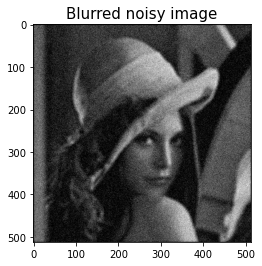

MSE = 605.1459688597995


In [5]:
noisy_blurred_img, _ = add_noise(blurred_img, 65, 'Blurred noisy image')
print(f'MSE = {mse(img, np.abs(noisy_blurred_img))}')

##### Recover

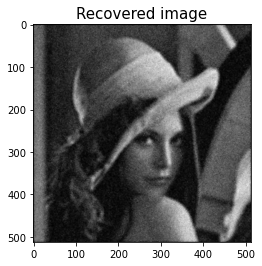

MSE = 239.2359253405721


In [6]:
def recover_image_w_wiener(image):
    recovered_img = wiener(image)
    plt.imshow(recovered_img, cmap='gray');
    plt.title('Recovered image', fontsize=15)
    plt.show()
    return recovered_img

rec = recover_image_w_wiener(noisy_blurred_img)
print(f'MSE = {mse(img, np.abs(rec))}')

### Ejemplo 2

(400, 600)


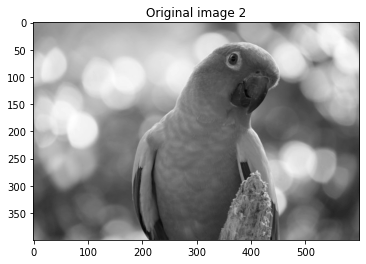

In [7]:
# Open image
img2 = np.array(Image.open('../../assets/bird.jpg').convert('L'))

# Plot image
plt.title('Original image 2')
plt.imshow(img2, cmap='gray');
print(img2.shape)

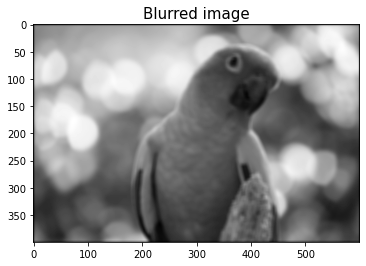

MSE = 96.27100926310221


In [8]:
# Blur
blurred_img2 = blur_img(img2, lpf)
print(f'MSE = {mse(img2, np.abs(blurred_img2))}')

noise variance = 1651.89


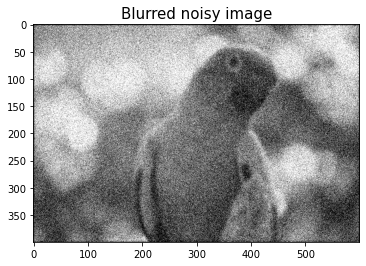

MSE = 1605.5873018952877


In [9]:
# Add noise
noisy_blurred_img2, _ = add_noise(blurred_img2, 65, 'Blurred noisy image')
print(f'MSE = {mse(img2, np.abs(noisy_blurred_img2))}')

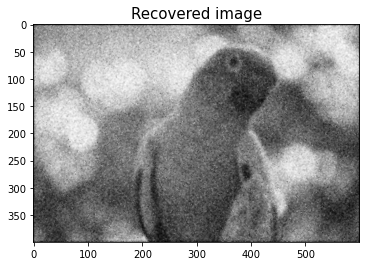

MSE = 388.5650064962225


In [10]:
rec2 = recover_image_w_wiener(noisy_blurred_img2)
print(f'MSE = {mse(img2, np.abs(rec2))}')

### Ejemplo 3

(512, 512)


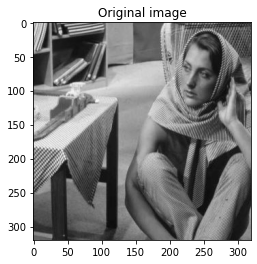

In [11]:
# Open image
img3 = np.array(Image.open('../../assets/barbara.jpg').convert('L'))

# Plot image
plt.title('Original image')
plt.imshow(img3, cmap='gray');
print(img.shape)

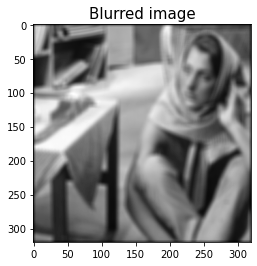

MSE = 369.28509845018385


In [12]:
# Blur
blurred_img3 = blur_img(img3, lpf)
print(f'MSE = {mse(img3, np.abs(blurred_img3))}')

noise variance = 142.93


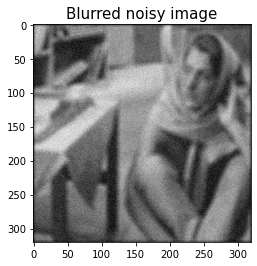

MSE = 511.09975383044963


In [13]:
# Add noise
noisy_blurred_img3, _ = add_noise(blurred_img3, 70, 'Blurred noisy image')
print(f'MSE = {mse(img3, np.abs(noisy_blurred_img3))}')

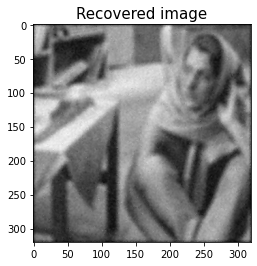

MSE = 399.8079994365954


In [14]:
rec3 = recover_image_w_wiener(noisy_blurred_img3)
print(f'MSE = {mse(img3, np.abs(rec3))}')